In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from zupt import Init_det_glrt 
from zupt.ZUPTaidedINS import *
from zupt import func_loaddataset
from zupt.detector import detector_adaptive

In [2]:
def plot_position_tracking(imu_data):
    """
    Plots the 2D top view of position tracking from IMU data.

    Parameters:
    imu_data (numpy.ndarray): IMU data array of shape (9, N) where the first two rows are x and y coordinates.
    """
    # Extract x and y positions
    x_positions = imu_data[0, :]  # X coordinates
    y_positions = imu_data[1, :]  # Y coordinates

    # Create the plot
    plt.figure(figsize=(10, 8))
    plt.plot(x_positions, y_positions, marker='o', linestyle='-', color='b', zorder=1)
    plt.title('2D Top View Position Tracking')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)
    plt.axis('equal')  # This ensures that unit increments are equal on both axes

    # Highlight the first position with higher zorder
    plt.scatter(x_positions[0], y_positions[0], color='green', s=100, edgecolor='black', label='Start', zorder=2)
    # Highlight the last position with higher zorder
    plt.scatter(x_positions[-1], y_positions[-1], color='red', s=100, edgecolor='black', label='End', zorder=2)

    # Add a legend to identify the start and end
    plt.legend()

    # Display the plot
    plt.show()

def plot_z_position_tracking(imu_data):
    """
    Plots the changes in the z-position over time from IMU data.

    Parameters:
    imu_data (numpy.ndarray): IMU data array of shape (9, N) where the third row is the z coordinate.
    """
    # Extract z positions
    z_positions = imu_data[2, :]  # Z coordinates

    # Create the plot
    plt.figure(figsize=(10, 8))
    plt.plot(z_positions, marker='o', linestyle='-', color='c')  # 'c' for cyan color
    plt.title('Z-Position Tracking Over Time')
    plt.xlabel('Time or Sequence Index')
    plt.ylabel('Z Position')
    plt.grid(True)

    # Display the plot
    plt.show()

def load_imu_data(file_path):
    """
    Load and convert IMU data from a given CSV file.

    Parameters:
    file_path (str): Path to the CSV file containing IMU data.

    Returns:
    numpy.ndarray: Transposed array containing converted IMU data.
    """
    # Read the dataset assuming comma-separated values without headers
    data = pd.read_csv(file_path, header=None, names=['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
    # Create an array of the modified data
    u = data.to_numpy().T

    return u


Main

In [3]:
simdata = Init_det_glrt.Init_det_glrt()
# Variables for calculating the performance
D = len(simdata['data_sets'])
Jadapt = 0
Jadapt_all = np.zeros((D, 3))
gamma_vec = np.logspace(4, 6, 20)
M = len(gamma_vec)
ctr = 1
Niter = M
Jfixed = np.zeros(M)
Jfixed_all = np.zeros((M, D, 3))

In [6]:
u = load_imu_data("core_old/imu_data.csv_3.csv")
# u = load_imu_data("./imu_data_test1.csv")
# u = load_imu_data("./imu_data.csv.csv")

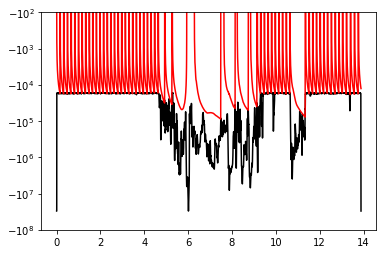

In [9]:
zupt, logL = detector_adaptive(u, simdata)
x_h, _ = ZUPTaidedINS(u, zupt, logL, True, simdata)

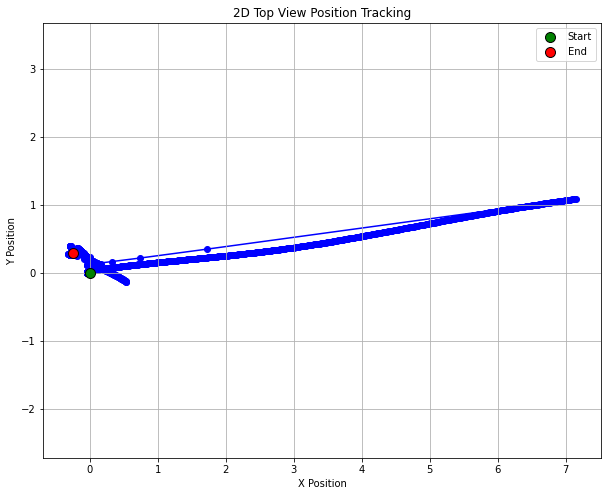

In [10]:
plot_position_tracking(x_h)

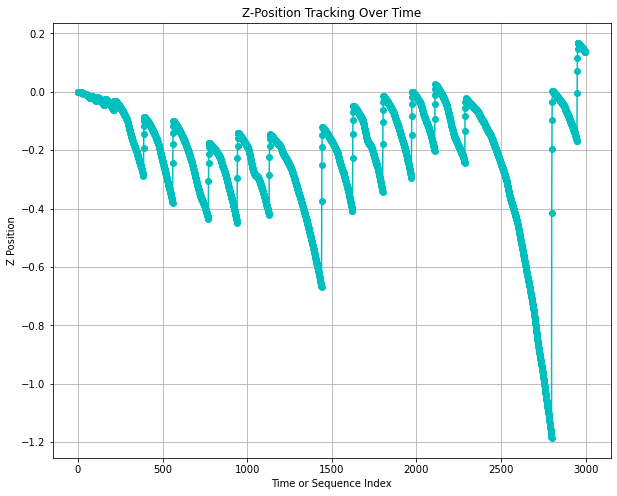

In [21]:
plot_z_position_tracking(x_h)

Iteration 1 out of 20


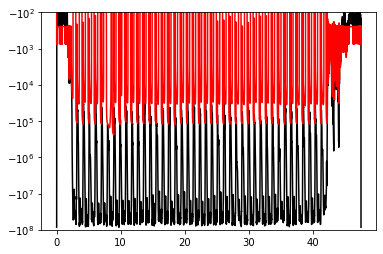

[-0.0890856  -0.02259215  0.4302652 ]


In [8]:
# Run all the data sets with the adaptive zero-velocity detector
for d in range(D):
    # Show the iteration number
    print(f'Iteration {d+1} out of {D}')

    # Set path
    path = f'Measurement_100521_{simdata["data_sets"][d+1]}/'

    # Load the data
    u = func_loaddataset.func_loaddataset(f'ZUPTaidedINS\{path}')

    # Run the detector
    zupt, logL = detector_adaptive(u, simdata)

    # Run the filter with adaptive threshold
    x_h, _ = ZUPTaidedINS(u, zupt, logL, True, simdata)

    print(x_h[0:3, -1])
    break

    # Calculate the error
    Jadapt += np.dot(x_h[0:3, -1], x_h[0:3, -1])
    Jadapt_all[d, :] = x_h[0:3, -1]

# Calculate mean square error
Jadapt /= D

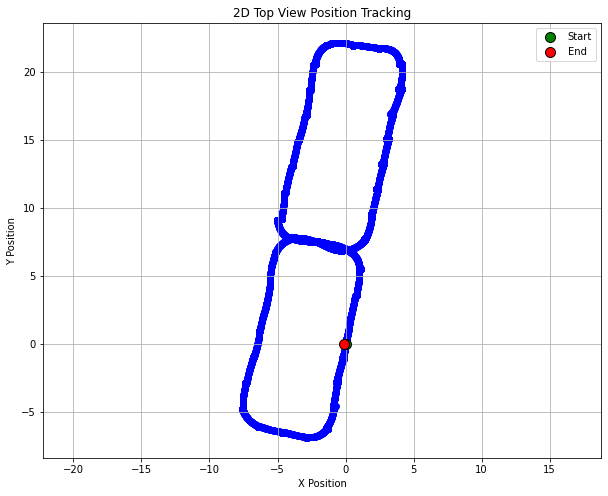

In [9]:
plot_position_tracking(x_h)

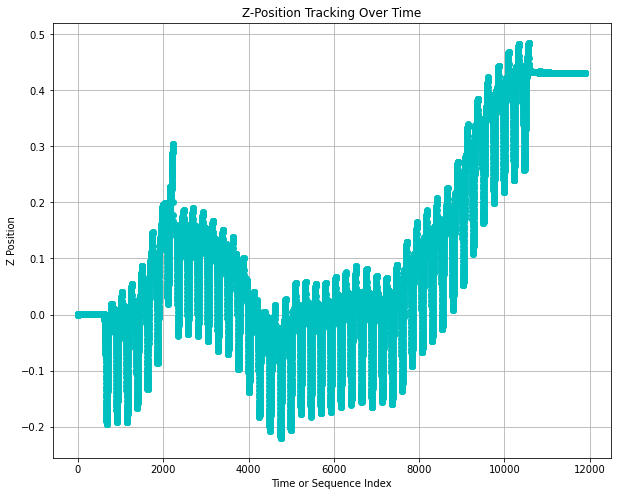

In [11]:
plot_z_position_tracking(x_h)

In [12]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
N = len(u[0])
P, Q, R, H = init_filter(simdata) # checked

x_h, cov, Id = init_vec(N, P, simdata) #checked
x_h[0:9, 0], quat = init_Nav_eq(u, simdata)

In [ ]:
f_u = np.mean(u[0, :20])
f_v = np.mean(u[1, :20])
f_w = np.mean(u[2, :20])

roll = np.arctan2(-f_v, -f_w)
pitch = np.arctan2(f_u, np.sqrt(f_v ** 2 + f_w ** 2))

attitude = np.array([roll, pitch, simdata['init_heading']])
Rb2t = Rt2b(attitude).T

In [ ]:
Rb2t

array([[ 0.99976721,  0.00339294,  0.02130748],
       [ 0.        , -0.9875579 ,  0.1572558 ],
       [ 0.02157593, -0.15721919, -0.98732801]])

In [ ]:
quat

array([-9.96826606e-01, -8.50935406e-04, -1.07549826e-02,  7.88690304e-02])

In [ ]:
x_h.shape, _.shape

((9, 11900), (9, 11900))

In [ ]:
# Run all the data with a fixed threshold
for m in range(M):
    # Show the iteration number
    print(f'Iteration {ctr} out of {Niter}')
    ctr += 1

    for d in range(D):
        print(f'Data set {d+1} out of {D}')

        # Set path
        path = f'Measurement_100521_{simdata["data_sets"][d]}/'

        # Load the data
        u = func_loaddataset.func_loaddataset(f'ZUPTaidedINS\{path}')

        # Update the detector threshold
        simdata['gamma'] = gamma_vec[m]

        # Run the detector
        zupt, logL = detector_adaptive(u, simdata)

        # Run the filter
        x_h, _ = ZUPTaidedINS(u, zupt, logL, False, simdata)

        # Calculate the error
        Jfixed[m] += np.dot(x_h[0:3, -1], x_h[0:3, -1])
        Jfixed_all[m, d, :] = x_h[0:3, -1]

Jfixed /= D

Iteration 1 out of 20
Data set 1 out of 20
Data set 2 out of 20
Data set 3 out of 20
Data set 4 out of 20
Data set 5 out of 20
Data set 6 out of 20
Data set 7 out of 20
Data set 8 out of 20
Data set 9 out of 20
Data set 10 out of 20
Data set 11 out of 20
Data set 12 out of 20
Data set 13 out of 20
Data set 14 out of 20
Data set 15 out of 20
Data set 16 out of 20
Data set 17 out of 20
Data set 18 out of 20
Data set 19 out of 20
Data set 20 out of 20
Iteration 2 out of 20
Data set 1 out of 20
Data set 2 out of 20
Data set 3 out of 20
Data set 4 out of 20
Data set 5 out of 20
Data set 6 out of 20
Data set 7 out of 20
Data set 8 out of 20
Data set 9 out of 20
Data set 10 out of 20
Data set 11 out of 20
Data set 12 out of 20
Data set 13 out of 20
Data set 14 out of 20
Data set 15 out of 20
Data set 16 out of 20
Data set 17 out of 20
Data set 18 out of 20
Data set 19 out of 20
Data set 20 out of 20
Iteration 3 out of 20
Data set 1 out of 20
Data set 2 out of 20
Data set 3 out of 20
Data set 

C:\Users\USER\AppData\Local\Temp\ipykernel_15852\91817824.py:6: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('symlog')


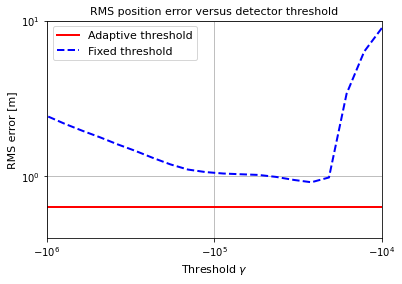

In [ ]:
# Plot the result
plt.figure()
plt.clf()
plt.loglog(-gamma_vec, np.sqrt(Jadapt) * np.ones_like(gamma_vec), 'r', linewidth=2)
plt.loglog(-gamma_vec, np.sqrt(Jfixed), 'b--', linewidth=2)
plt.yscale('symlog')
plt.xscale('symlog')
plt.legend(['Adaptive threshold', 'Fixed threshold'], loc='best', fontsize=11)
plt.title('RMS position error versus detector threshold', fontsize=11)
plt.ylabel('RMS error [m]', fontsize=11)
plt.xlabel('Threshold $\\gamma$', fontsize=11)
plt.axis([-gamma_vec[-1], -gamma_vec[0], 1e-1, 1e1])
plt.grid(True)
plt.box(True)
plt.show()

In [ ]:
# Compute error from concatenated data
print(np.linalg.norm(np.sum(Jadapt_all, axis=0)))
print(np.min(np.sqrt(np.sum(np.sum(Jfixed_all, axis=1) ** 2, axis=1))))

9.84657716783097
16.086072631052826


In [ ]:
gamma_vec.shape , Jadapt.shape

((20,), ())

In [ ]:
Jadapt , Jfixed , Jadapt_all

(0.29527065224207544,
 array([75.64029414, 31.62664756,  6.5861417 ,  0.95893672,  0.82736613,
         0.89041385,  0.97474308,  1.03248211,  1.05223858,  1.07444152,
         1.11821948,  1.19676152,  1.36734909,  1.59834435,  1.86746659,
         2.13362672,  2.44356946,  2.74910081,  3.09523995,  3.50125614]),
 array([[-0.0288682 ,  0.07179067,  0.48529654],
        [-0.0890856 , -0.02259215,  0.4302652 ],
        [-0.06849203, -0.11475815,  0.27874954],
        [ 0.13906644, -0.04541051,  0.41211078],
        [-0.14332786, -0.01901676,  0.33441952],
        [ 0.03029845, -0.09152118,  0.27595421],
        [ 0.10044775, -0.12009581,  0.39355037],
        [ 0.01294933, -0.07123852,  0.48200123],
        [-0.17167173, -0.08397606,  0.45012837],
        [ 0.05451091, -0.01016102,  0.40978265],
        [ 0.01367146, -0.08962598,  0.40591268],
        [-0.44832301, -0.1838653 ,  0.46146713],
        [-0.28100059, -0.20640273,  0.6864638 ],
        [-0.487064  , -0.13643935,  0.52092258]

In [ ]:
np.savetxt('gamma_vec.txt', gamma_vec, delimiter=',', fmt='%.9f')
# np.savetxt('Jadapt.txt', Jadapt, delimiter=',', fmt='%.9f')
np.savetxt('Jfixed.txt', Jfixed, delimiter=',', fmt='%.9f')